#  Urban vs Rural
## Importing Libraries & Loading Data

In [1]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns',150)
sns.set_style('whitegrid')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import recall_score, precision_score
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
young = pd.read_csv('E:/Data Science/Experience/urban vs rural/preference.csv')

In [3]:
young.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [4]:
young.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [5]:
young.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

## Exploratory data analysis
### Missing values


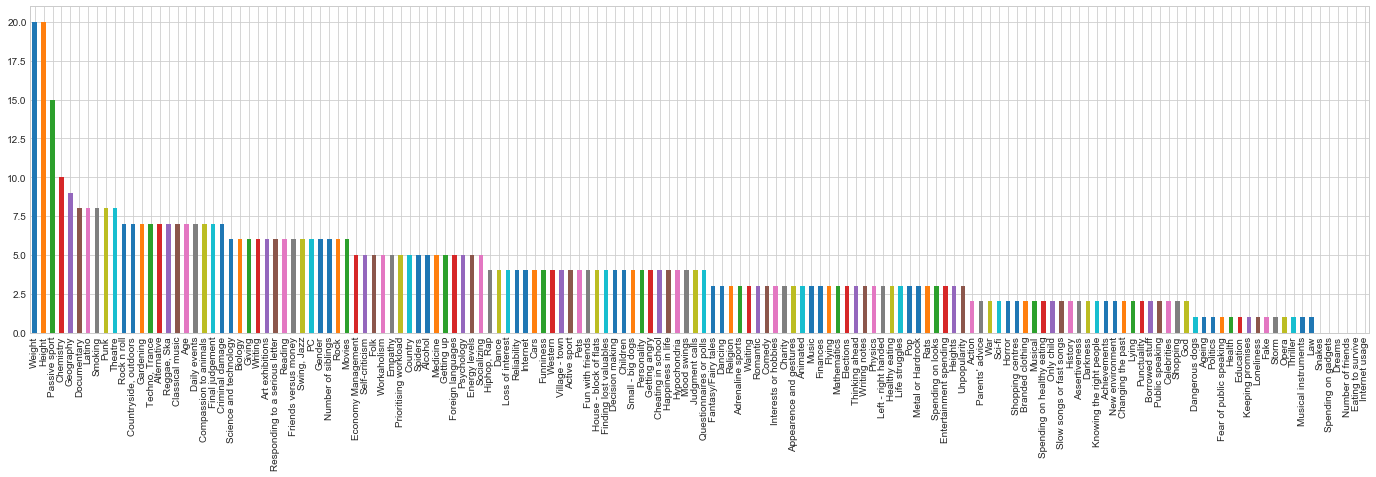

In [6]:
nulls = young.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (24,6))

In [7]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
young["all"] = ""

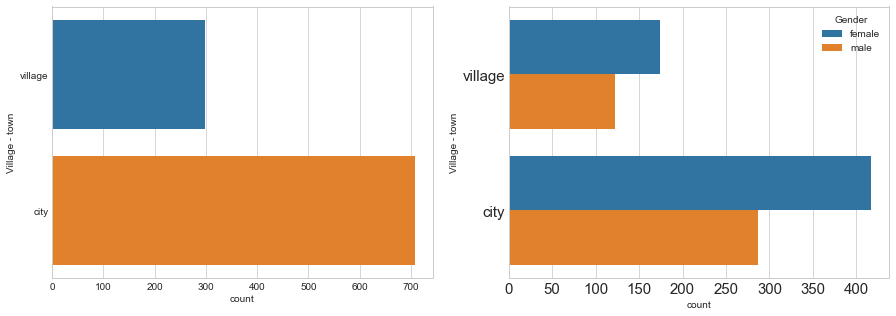

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.countplot(y = var_of_interest, data = young, ax = ax[0])
sns.countplot(y = var_of_interest, hue = 'Gender', data = young, ax = ax[1])
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)


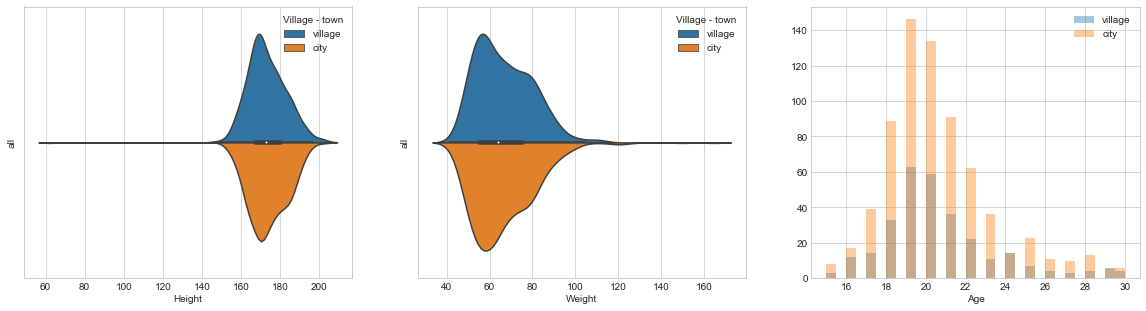

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0])
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1])

_ = sns.distplot(young[young[var_of_interest]=='village'].Age.dropna(),label = 'village', ax = ax[2], kde = False,bins = 30)
_ = sns.distplot(young[young[var_of_interest]=='city'].Age.dropna(),label = 'city', ax = ax[2], kde = False,bins = 30)
ax[2].legend()


In [10]:
display(young[young['Height']<70][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])
display(young[young['Weight']>120][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])

,Age,Height,Weight,Gender,Village - town
676,20.0,62.0,55.0,female,city


,Age,Height,Weight,Gender,Village - town
859,20.0,190.0,125.0,male,city
885,23.0,NaN,165.0,female,city
992,30.0,200.0,150.0,male,city


In [11]:
young.drop([676,885,992, 859], inplace = True)

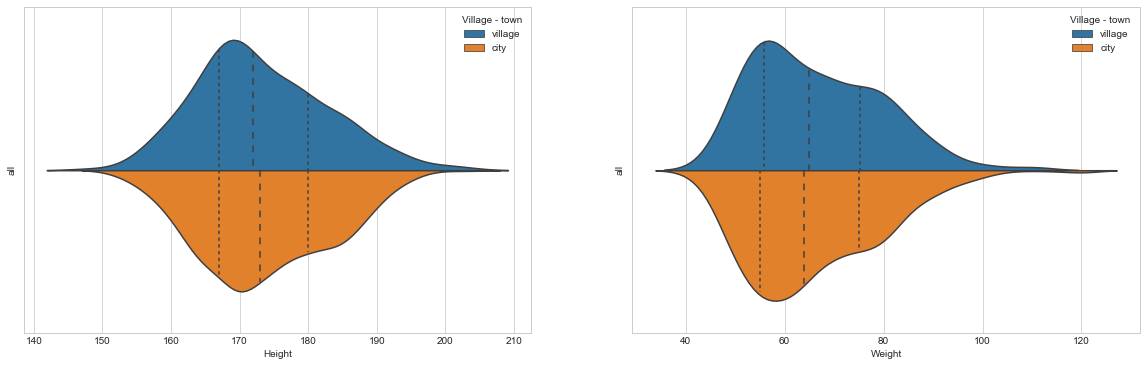

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y="all", hue=var_of_interest, data=data, split=True, ax = ax[0], inner = 'quartile')
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y="all", hue=var_of_interest, data=data, split=True, ax = ax[1], inner = 'quartile')

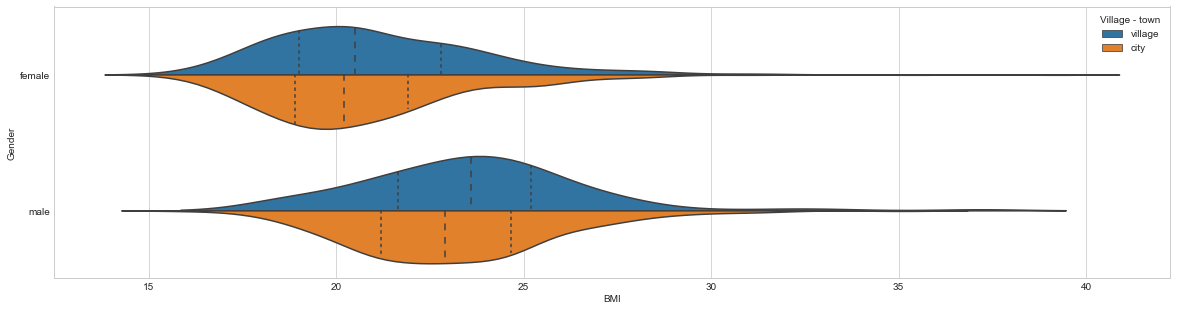

In [13]:
young['BMI'] = round(young['Weight']/((young['Height']/100)**2),1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
data = young.dropna(subset=['BMI'])
_ = sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data, split=True, inner = 'quartile', ax = ax)


In [14]:
import scipy.stats as stats
city_bmi = data[data[var_of_interest]=='city'].BMI
village_bmi  = data[data[var_of_interest]=='village'].BMI
t, p = stats.ttest_ind(village_bmi, city_bmi, axis=0, equal_var=False)
print(' t-stat = {t} \n p-value = {p}'.format(t=t,p=p/2))


 t-stat = 1.7734182239050904 
 p-value = 0.03837342374443175


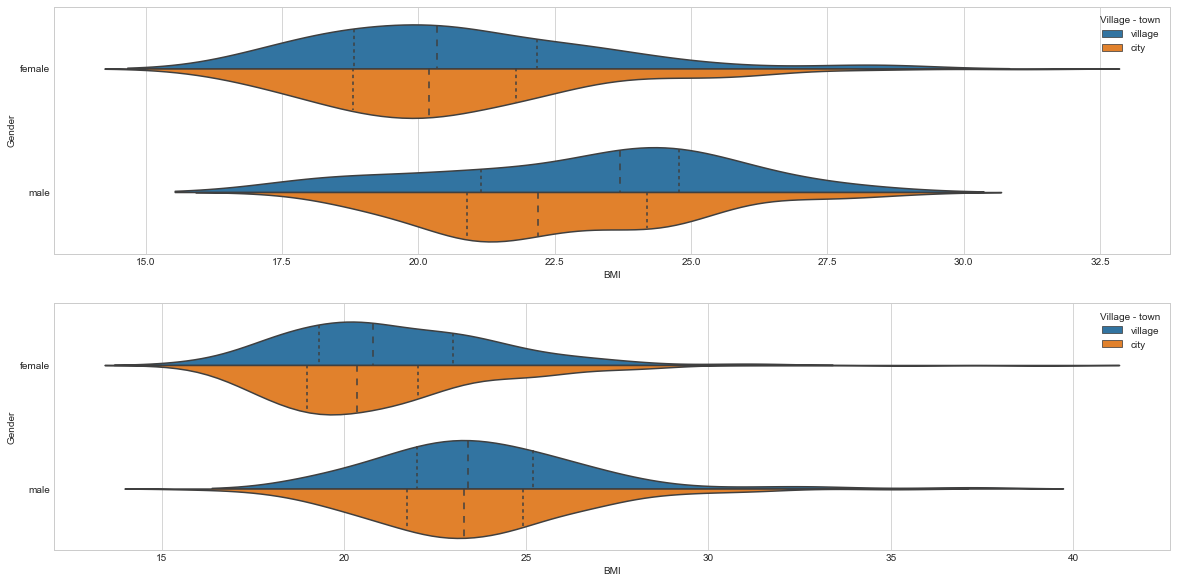

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
data_under = data[data['Age']<20]
data_above = data[data['Age']>=20]
_ = sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, split=True, 
                   inner = 'quartile', ax = ax[0], hue_order = ['village', 'city'])
_ = sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_above, split=True, 
                   inner = 'quartile', ax = ax[1], hue_order = ['village', 'city'])


In [16]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")

def correlation_plot(var_of_interest, df_main, mapping, figsize = (10,30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    

    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    cols_cats = [col for col in df.columns if df[col].dtype=='object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5,10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]
    

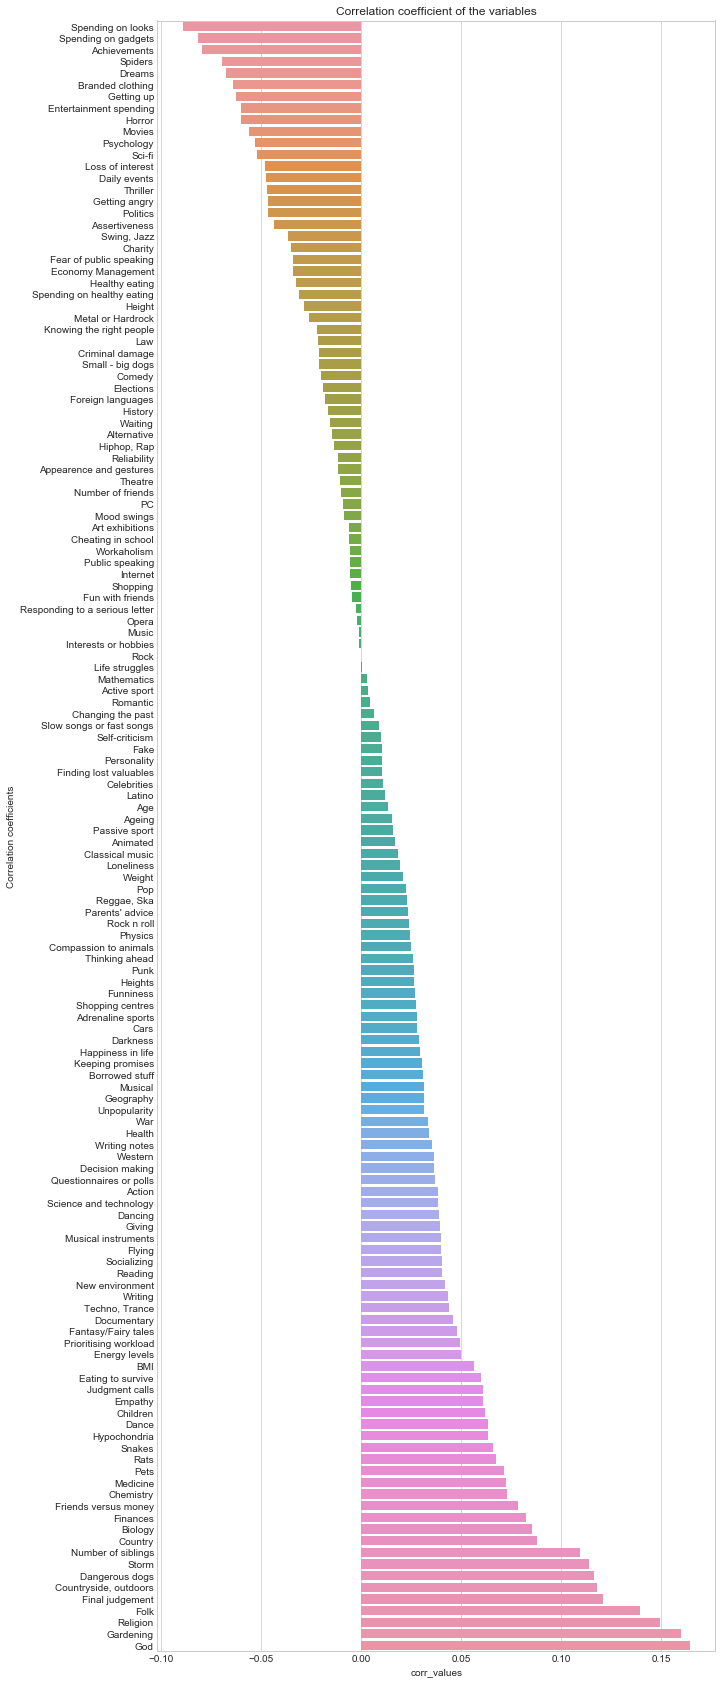

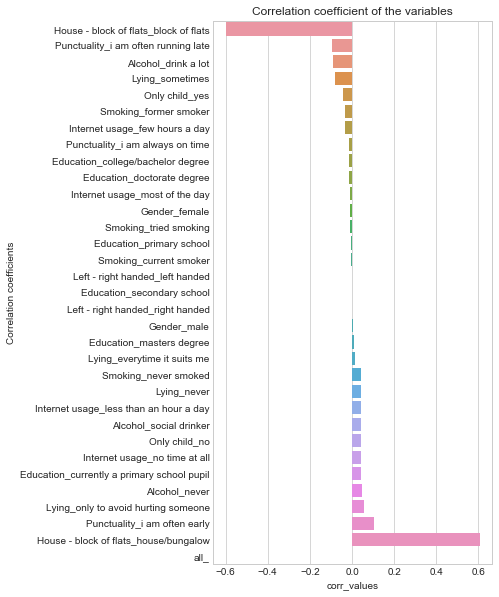

In [17]:
corrs_area = correlation_plot(var_of_interest, young, mapping)

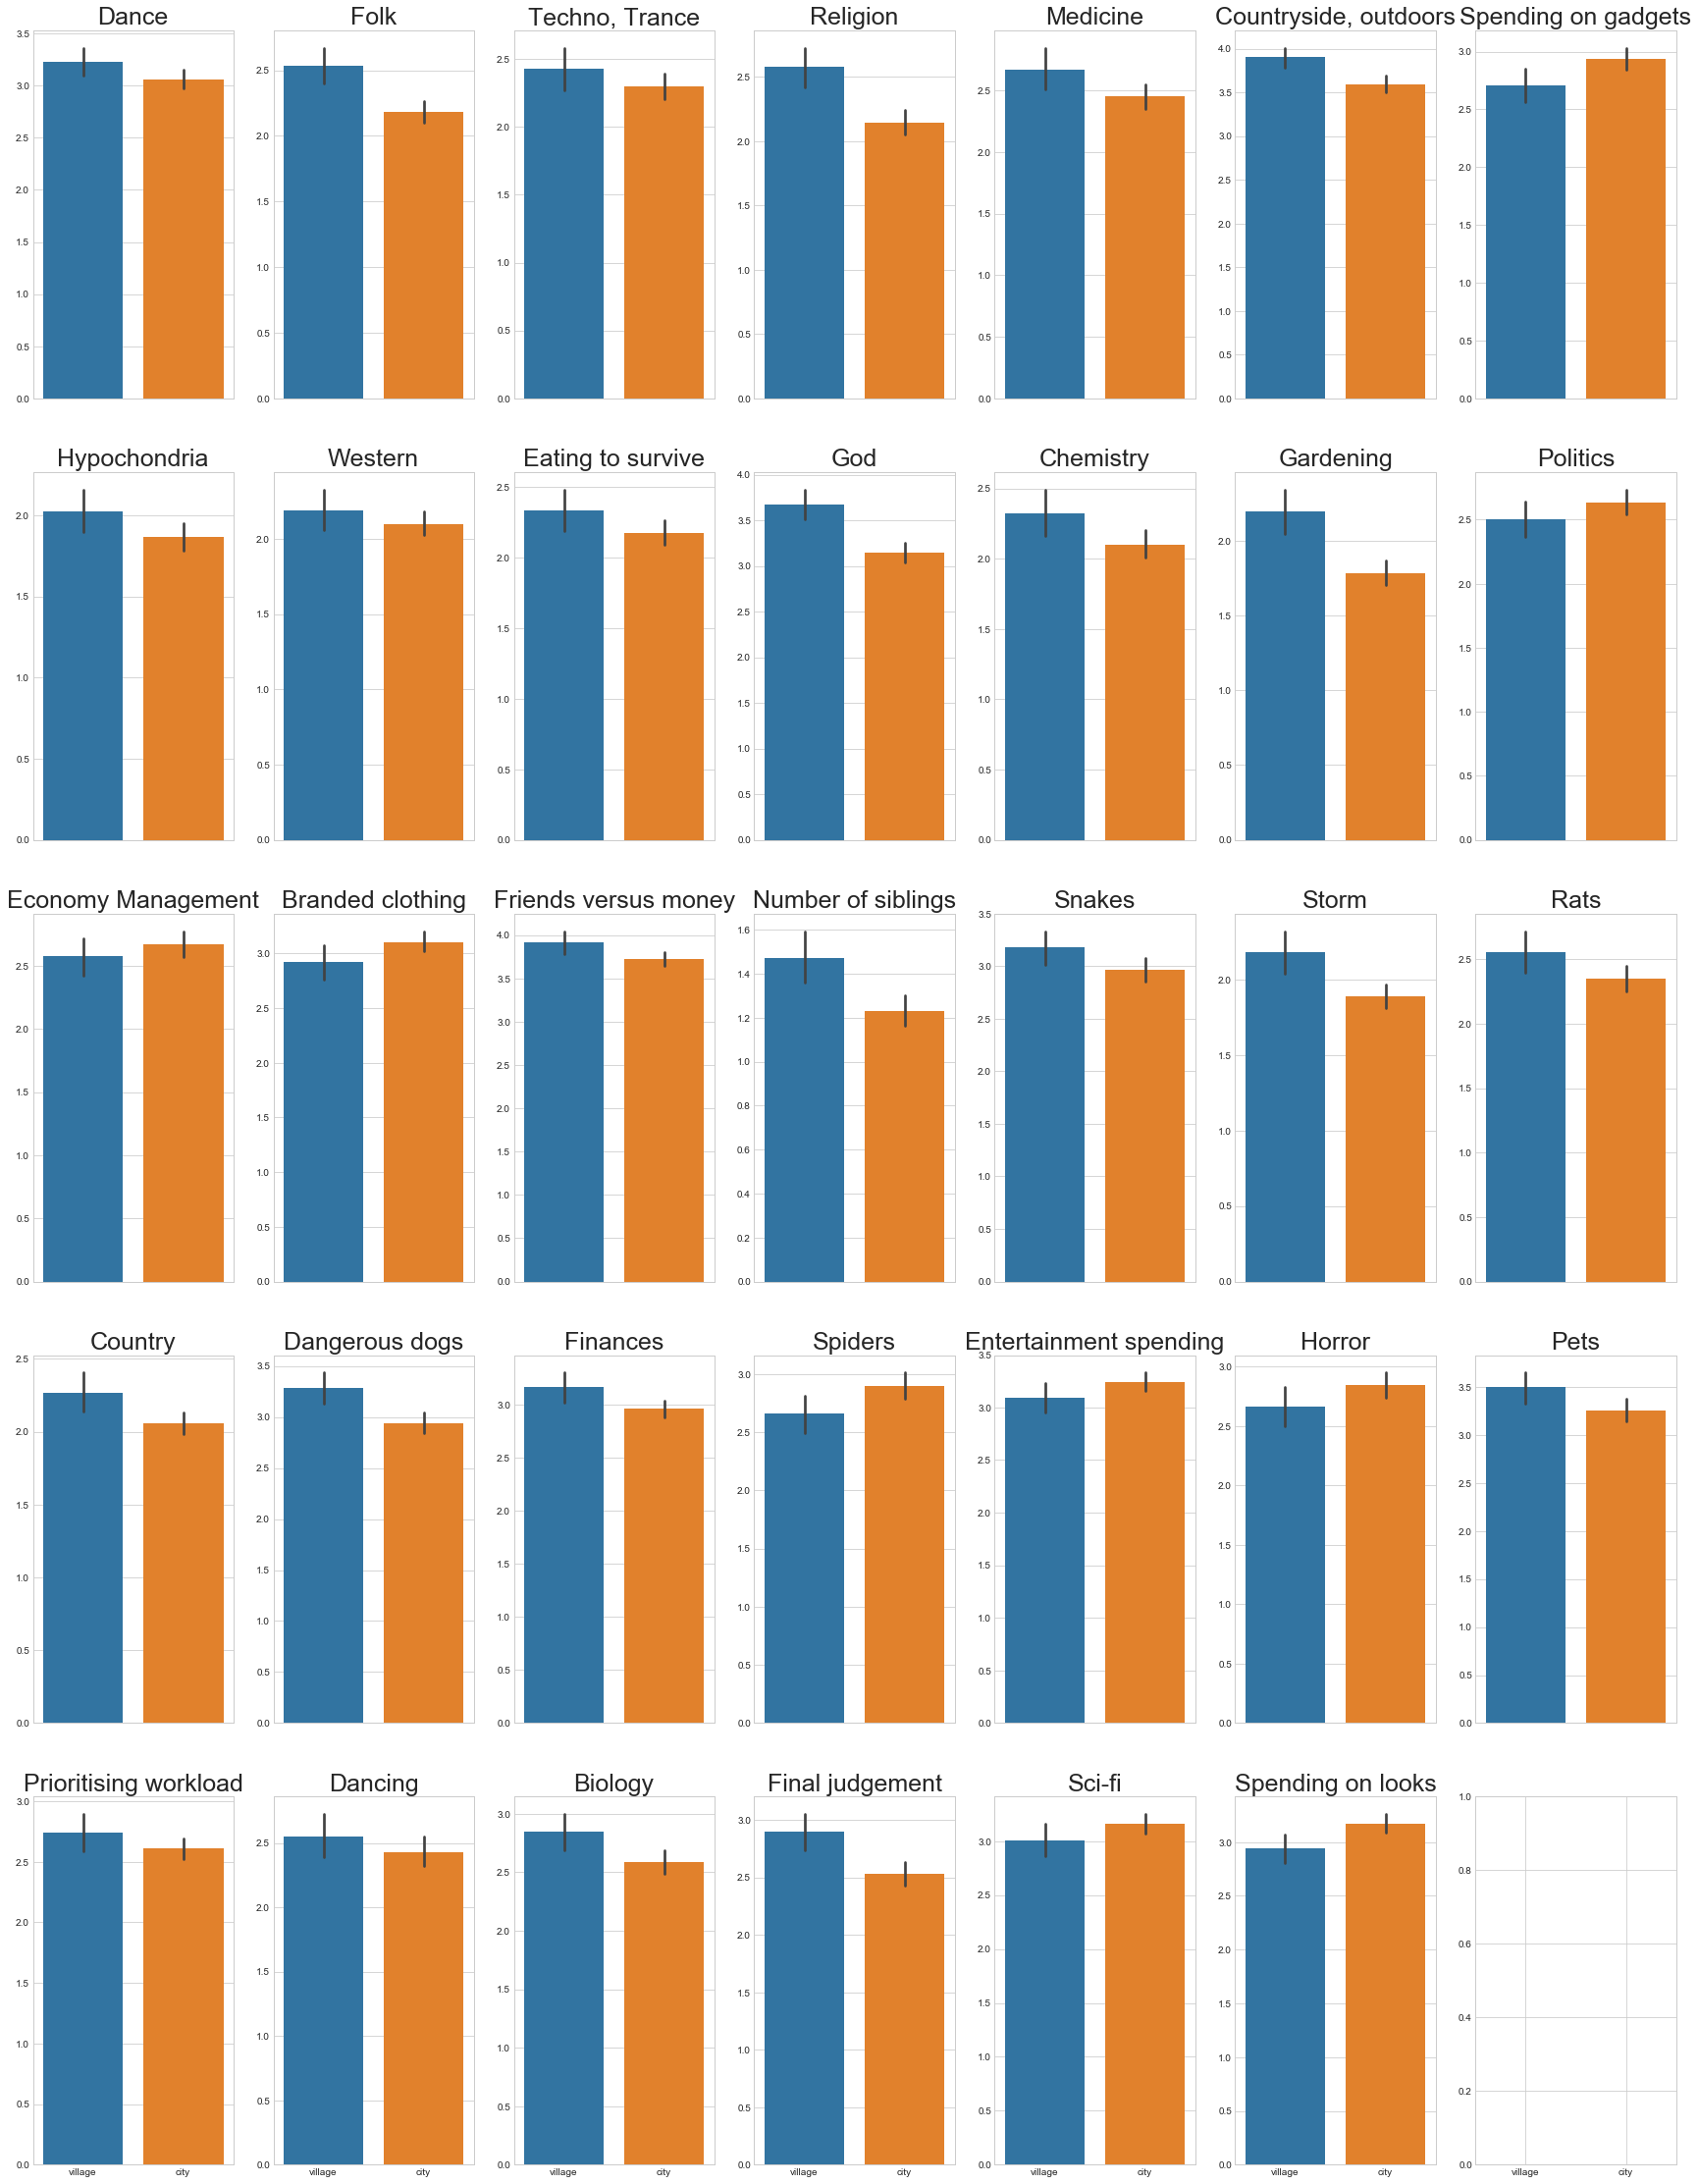

In [18]:
good_columns = ['Dance', 'Folk', 'Techno, Trance','Religion', 'Medicine', 'Countryside, outdoors']
good_columns = good_columns + ['Spending on gadgets','Hypochondria','Western', 'Eating to survive', 'God', 'Chemistry', 'Gardening']
good_columns = good_columns + ['Politics','Economy Management','Branded clothing','Friends versus money','Number of siblings', 'Snakes']
good_columns = good_columns + ['Storm', 'Rats', 'Country', 'Dangerous dogs', 'Finances', 'Spiders', 'Entertainment spending']
good_columns = good_columns + ['Horror', 'Pets', 'Prioritising workload', 'Dancing', 'Biology', 'Final judgement', 'Sci-fi', 'Spending on looks']
fig, ax = plt.subplots(nrows = 5, ncols = 7 ,figsize=(30,40), sharex=True)
start = 0
for j in range(5):
    for i in range(7):
        if start == len(good_columns):
            break
        sns.barplot(y=good_columns[start], x=var_of_interest, data=young, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(good_columns[start], fontsize=25)
        start += 1

In [19]:
corr = young.corr()

os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os.head())
display(os.tail())

Weight               BMI          0.845273
Height               Weight       0.737569
Biology              Medicine     0.717139
                     Chemistry    0.688564
Fantasy/Fairy tales  Animated     0.676276
dtype: float64

Changing the past  Happiness in life   -0.354172
Dangerous dogs     Small - big dogs    -0.372104
Life struggles     Weight              -0.382689
                   Height              -0.398125
Loneliness         Happiness in life   -0.440208
dtype: float64

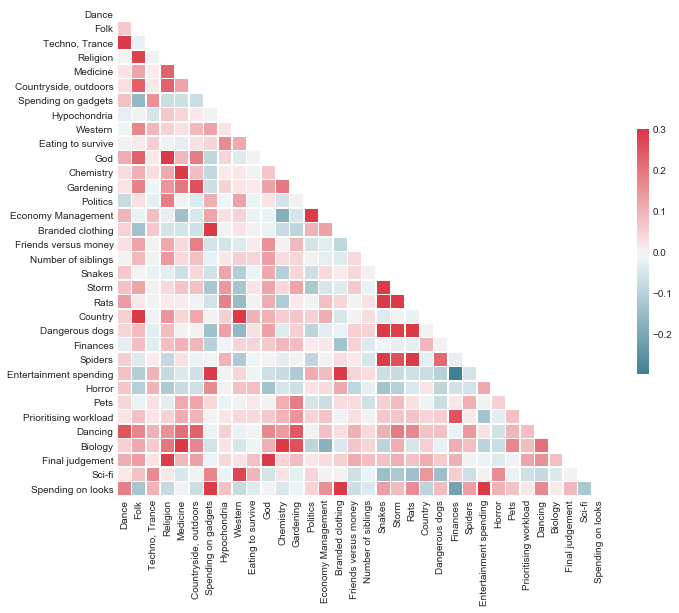

In [20]:
corr = young[good_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
corr = young.corr()
os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os[abs(os)>0.5])
drop_colinera_cols = os[abs(os)>0.5].reset_index()['level_1']

Weight                   BMI                  0.845273
Height                   Weight               0.737569
Biology                  Medicine             0.717139
                         Chemistry            0.688564
Fantasy/Fairy tales      Animated             0.676276
Shopping                 Shopping centres     0.650689
Chemistry                Medicine             0.629480
Classical music          Opera                0.595599
Mathematics              Physics              0.591291
Snakes                   Rats                 0.570754
Metal or Hardrock        Punk                 0.547129
Art exhibitions          Theatre              0.540432
Rock                     Metal or Hardrock    0.527834
Shopping                 Spending on looks    0.512193
Religion                 God                  0.509766
Rock                     Punk                 0.508960
Fear of public speaking  Public speaking      0.507708
Horror                   Thriller             0.505720
Storm     

## Machine Learning
### Preparing the dataset for ML

In [22]:
clean_data = young.dropna(subset=[var_of_interest])
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
features_cats = [col for col in clean_data.columns if clean_data[col].dtype=='object']

features_int = list(set(features_int) - set(drop_colinera_cols))
print ('Number of features {:.0f}'.format(len(features_int)))

Number of features 123


In [23]:
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

In [24]:
Y = clean_data[var_of_interest]
for key, val in mapping[var_of_interest].items():
    Y.replace(key,val, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

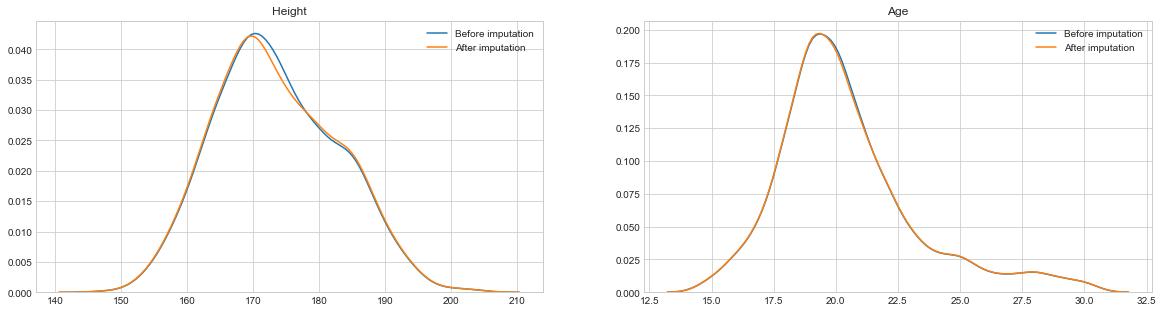

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

_ = sns.kdeplot(X.Height,label = 'Before imputation', ax = ax[0])
_ = sns.kdeplot(clean_data.Height, label = 'After imputation', ax = ax[0])
_ = ax[0].set_title('Height')

_ = sns.kdeplot(X.Age,label = 'Before imputation', ax = ax[1])
_ = sns.kdeplot(clean_data.Age, label = 'After imputation', ax = ax[1])
_ = ax[1].set_title('Age')

### standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

### Regression model

In [27]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
KF = KFold(len(x_train), n_folds=5)
param_grid = {'C':[.001,.01,.03,.1,.3,1,3,10]}
grsearch = GridSearchCV(clr, param_grid=param_grid, cv=KF, scoring = 'f1')
grsearch.fit(x_train, y_train)
print(grsearch.best_params_)

# fitting logistic regression and evaluating
clr = LogisticRegression(C=grsearch.best_params_['C'])
clr.fit(x_train, y_train)

print('Average accuracy score on CV set: {:.2f}'.format(np.mean(cross_val_score(clr, x_train, y_train, cv=KF))))
print('Average f1 on CV set: {:.2f}'.format(np.mean(cross_val_score(clr, x_train, y_train, cv=KF, scoring = 'f1'))))
print('')
print('Accuracy score on test set is: {:.2f}'.format(clr.score(x_test, y_test)))
recall = recall_score(y_test, clr.predict(x_test))
print ('Recall on test: {:.2f}'.format(recall))
precision = precision_score(y_test, clr.predict(x_test))
print ('Presicion on test: {:.2f}'.format(precision))
print ('F1 score on test: {:.2f}'.format((2*recall*precision /(recall + precision))))


{'C': 0.001}
Average accuracy score on CV set: 0.65
Average f1 on CV set: 0.36

Accuracy score on test set is: 0.66
Recall on test: 0.28
Presicion on test: 0.53
F1 score on test: 0.36


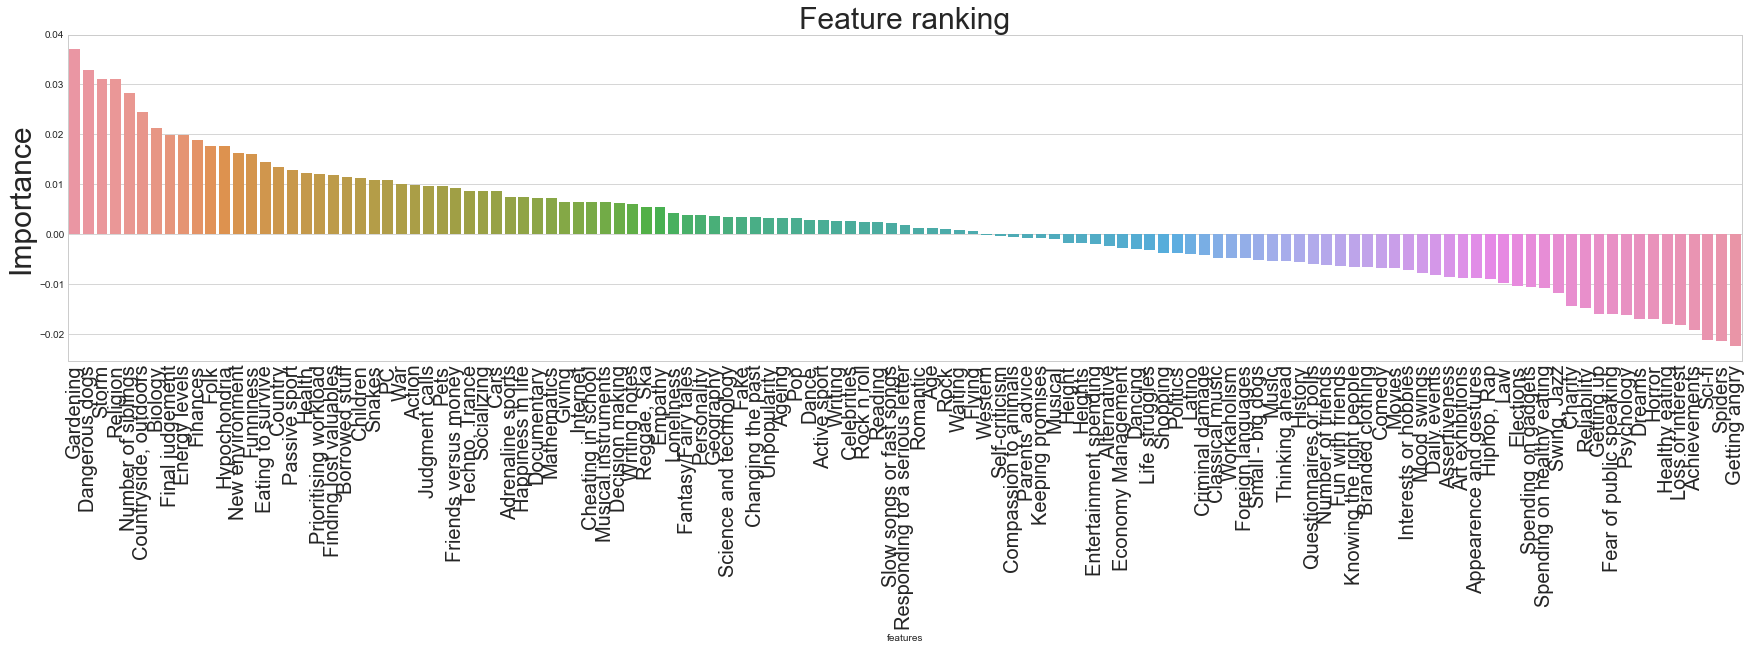

In [28]:
feat_coeff = pd.DataFrame({'features': X.columns,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

fig, ax1 = plt.subplots(1,1, figsize=(30,6))
_ = sns.barplot(x=feat_coeff.features, y=feat_coeff.impacts, ax=ax1)
_ = ax1.set_title('Feature ranking', size=30)
_ = ax1.set_xticklabels(labels=feat_coeff.features, size=20, rotation=90)
_ = ax1.set_ylabel('Importance', size=30)

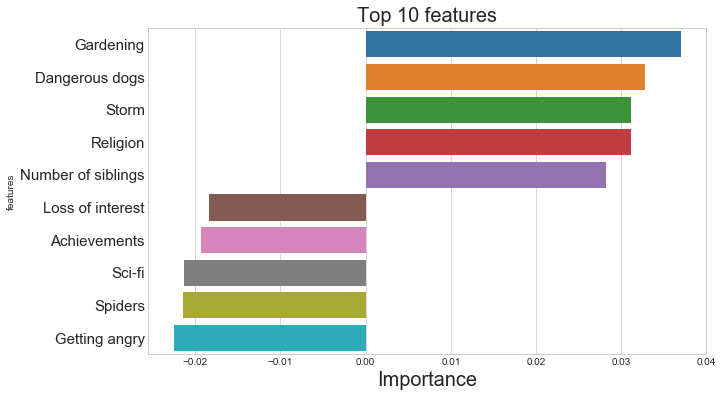

In [29]:
top10 = pd.concat([feat_coeff.head(5),feat_coeff.tail(5)])
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
_ = sns.barplot(y=top10.features, x=top10.impacts, ax=ax1)
_ = ax1.set_title('Top 10 features', size=20)
_ = ax1.set_yticklabels(labels=top10.features, size=15)
_ = ax1.set_xlabel('Importance', size=20)